# MAIN TRY OF CUSTOMER CHURN

## Load Data

In [ ]:
import pandas as pd # type: ignore
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore

data = pd.read_csv('E:/Practice/python/ml/churn/final/dataset/Telco-Customer-Churn.csv').drop('customerID', axis=1)

## Data Pre-Processing

In [13]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.loc[(data['TotalCharges'].isnull()) & (data['tenure'] == 0), 'TotalCharges'] = 0.0
data['SeniorCitizen'] = data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [15]:
# 1 Year Tenure Group
bins = [0,12,24,36,48, data['tenure'].max()]
labels = ['1 Year', '2 Year', '3 Year', '4 Year', '>4 Years']
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels)

# # Handle NaN values in tenure_group
# data['tenure_group'] = data['tenure_group'].replace({np.nan: 'Not Available'})

# Drop rows where tenure_group is np.nan
data = data.dropna(subset=['tenure_group'])

grouped = data.groupby('tenure_group').size().reset_index(name='total_churned_customers')

data.shape

(7032, 21)

In [16]:
data['CLV'] = data['tenure'] * data['MonthlyCharges']

data['AvgMonthlyCharges'] = data['TotalCharges'] / data['tenure']
data['AvgMonthlyCharges'].fillna(data['MonthlyCharges'], inplace = True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,CLV,AvgMonthlyCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 Year,29.85,29.850000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,0,3 Year,1936.30,55.573529
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 Year,107.70,54.075000
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,4 Year,1903.50,40.905556
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 Year,141.40,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,2 Year,2035.20,82.937500
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,>4 Years,7430.40,102.262500
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 Year,325.60,31.495455
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 Year,297.60,76.650000


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis = 1)
Y = data['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)
X_train.shape, X_test.shape

((5625, 22), (1407, 22))

In [18]:
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges','CLV','AvgMonthlyCharges']

## Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import LabelEncoder # type: ignore

# Label Encoding
label_encoder = LabelEncoder()
X_train_label_encoded = X_train.copy()
X_test_label_encoded = X_test.copy()

for col in categorical_vars:
    X_train_label_encoded[col] = label_encoder.fit_transform(X_train_label_encoded[col])
    X_test_label_encoded[col] = label_encoder.transform(X_test_label_encoded[col])

# # Display the encoded data
# print("Label Encoded Train Data:")
# print(X_train_label_encoded.head(2))
# print("\nLabel Encoded Test Data:")
# print(X_test_label_encoded.head(2))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# One-Hot Encoding
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_vars),   
        ('cat', categorical_transformer, categorical_vars)
    ])

X_train_onehot_encoded = preprocessor.fit_transform(X_train)
X_test_onehot_encoded = preprocessor.transform(X_test)

# Getting feature names after processing
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_vars)
feature_names = numerical_vars + list(cat_feature_names)

X_train_onehot_encoded = pd.DataFrame(X_train_onehot_encoded, columns=feature_names)
X_test_onehot_encoded = pd.DataFrame(X_test_onehot_encoded, columns=feature_names)

# print("\nOne-Hot Encoded Train Data:")
# print(X_train_onehot_encoded.head(2))
# print("\nOne-Hot Encoded Test Data:")
# print(X_test_onehot_encoded.head(2))

## Testing for Dimensionality Reduction

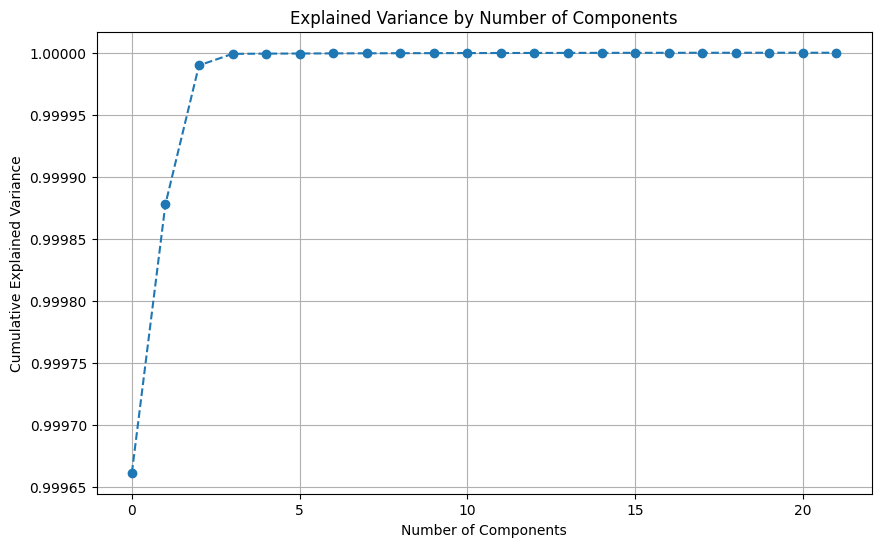

Number of components that explain at least 95% of the variance: 1


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on label encoded data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_label_encoded)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

# Find the number of components that explain at least 95% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.10) + 1
print(f"Number of components that explain at least 10% of the variance: {n_components}")

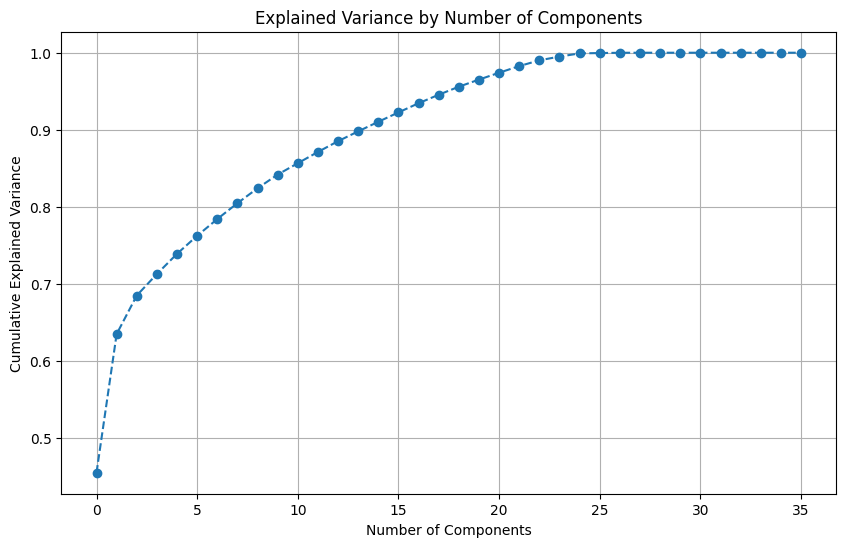

Number of components that explain at least 95% of the variance: 1


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on label encoded data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_onehot_encoded)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

# Find the number of components that explain at least 95% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.10) + 1
print(f"Number of components that explain at least 10% of the variance: {n_components}")

## Model Training

#### Function to Train and Evaluate the Metrics for each Model

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

def train_and_evaluate(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred_proba)
    
    cv_scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring='roc_auc')
    
    return {
        'accuracy' : accuracy,
        'precision' : precision,
        'recall' : recall,
        'f1' : f1,
        'roc_auc' : roc_auc,
        'cv_roc_auc_mean' : cv_scores.mean(),
        'cv_roc_auc_std' : cv_scores.std()
    }

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from joblib import dump, load
import pandas as pd

models = {
    'Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'LDA': LDA(),
    'QDA': QDA(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Categorical Boosting':CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1, loss_function='Logloss', verbose=0),
    'AdaBoost': AdaBoostClassifier(n_estimators=50,random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100,random_state=42),
    'Multi-layer Perceptron': MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
}

sampleing = {
    'No Sampleing',
    'SMOTE',
    'ENN',
    'SMOTE - ENN'
}

def perform_sampling(X_train_data, Y_train_data, sampling_method):
    if sampling_method == 'SMOTE':
        return SMOTE(sampling_strategy='minority', random_state=42).fit_resample(X_train_data, Y_train_data)
    elif sampling_method == 'ENN':
        return EditedNearestNeighbours(sampling_strategy='auto').fit_resample(X_train_data, Y_train_data)
    elif sampling_method == 'SMOTE - ENN':
        return SMOTEENN(random_state=42).fit_resample(X_train_data, Y_train_data)
    else:
        return X_train_data, Y_train_data

training_data = {
    'LabelEncoded',
    'OneHotEncoded',
}
def getdata(data_type):
    if data_type == 'OneHotEncoded':
        return X_train_onehot_encoded, Y_train, X_test_onehot_encoded, Y_test
    else:
        return X_train_label_encoded, Y_train, X_test_label_encoded, Y_test
results = {}

for data_name in training_data:
    X_train_data, Y_train_data, X_test_data, Y_test_data = getdata(data_name)
    for sample_name in sampleing:
        print(f"Evaluating {sample_name} with {data_name} data...")

        X_resampled, Y_resampled = perform_sampling(X_train_data, Y_train_data, sample_name)
        scaler = StandardScaler()
        X_resampled = scaler.fit_transform(X_resampled)
        X_test_data = scaler.transform(X_test_data)
        
        for model_name, model in models.items():
            print(f"Training {model_name}...")
            results[f"{model_name} - {data_name} - {sample_name}"] = train_and_evaluate(model, X_resampled, X_test_data, Y_resampled, Y_test_data)

            model_file = f"E:/Practice/python/ml/churn/final/2models/{sample_name} - {data_name} - {model_name}.joblib"
            dump(model, model_file)
            print(f"Model saved to {model_file}")

results_df = pd.DataFrame(results).T.reset_index()

# # Save to CSV
results_df.to_csv('2metrics.csv', index=False)

for name, metrics in results.items():
    print(f"\n {name} Results:")
    for metrics, value in metrics.items():
        print(f"{metrics}: {value: .4f}")

Evaluating ENN with OneHotEncoded data...
Training Naive Bayes...
Model saved to E:/Practice/python/ml/churn/final/2models/ENN - OneHotEncoded - Naive Bayes.joblib
Training Bernoulli Naive Bayes...
Model saved to E:/Practice/python/ml/churn/final/2models/ENN - OneHotEncoded - Bernoulli Naive Bayes.joblib
Training LDA...
Model saved to E:/Practice/python/ml/churn/final/2models/ENN - OneHotEncoded - LDA.joblib
Training QDA...
Model saved to E:/Practice/python/ml/churn/final/2models/ENN - OneHotEncoded - QDA.joblib
Training K-Nearest Neighbors...
Model saved to E:/Practice/python/ml/churn/final/2models/ENN - OneHotEncoded - K-Nearest Neighbors.joblib
Training Logistic Regression...
Model saved to E:/Practice/python/ml/churn/final/2models/ENN - OneHotEncoded - Logistic Regression.joblib
Training Decision Tree...
Model saved to E:/Practice/python/ml/churn/final/2models/ENN - OneHotEncoded - Decision Tree.joblib
Training Random Forest...
Model saved to E:/Practice/python/ml/churn/final/2mode

In [56]:
results_df = pd.DataFrame(results).T.reset_index()
print("\nResults:")
print(results_df)
results_df.to_csv('3metrics.csv', index=False)


Results:
                                             index  accuracy  precision  \
0                Naive Bayes - OneHotEncoded - ENN  0.645345   0.419562   
1      Bernoulli Naive Bayes - OneHotEncoded - ENN  0.665245   0.434371   
2                        LDA - OneHotEncoded - ENN  0.732054   0.497512   
3                        QDA - OneHotEncoded - ENN  0.766169   0.549234   
4        K-Nearest Neighbors - OneHotEncoded - ENN  0.718550   0.482595   
..                                             ...       ...        ...   
107                     SVM - LabelEncoded - SMOTE  0.734186   0.000000   
108    Categorical Boosting - LabelEncoded - SMOTE  0.265814   0.265814   
109                AdaBoost - LabelEncoded - SMOTE  0.265814   0.265814   
110             Extra Trees - LabelEncoded - SMOTE  0.331201   0.271923   
111  Multi-layer Perceptron - LabelEncoded - SMOTE  0.265814   0.265814   

       recall        f1   roc_auc  cv_roc_auc_mean  cv_roc_auc_std  
0    0.871658  0.566

In [59]:
sorted_results = sorted(results.items(), key=lambda x: (
    x[1]['accuracy'],
    x[1]['f1'], 
    x[1]['recall'],
    x[1]['roc_auc'],
), reverse=True)

for name, metrics in sorted_results[:5]:
    print(f"\n {name} Results:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1: {metrics['f1']:.4f}")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}")


 Gradient Boosting - OneHotEncoded - No Sampleing Results:
Accuracy: 0.7903
Precision: 0.6119
Recall: 0.5775
F1: 0.5942
ROC AUC: 0.8298

 Categorical Boosting - OneHotEncoded - No Sampleing Results:
Accuracy: 0.7882
Precision: 0.6022
Recall: 0.5989
F1: 0.6005
ROC AUC: 0.8313

 Random Forest - OneHotEncoded - No Sampleing Results:
Accuracy: 0.7854
Precision: 0.6118
Recall: 0.5267
F1: 0.5661
ROC AUC: 0.8206

 AdaBoost - OneHotEncoded - No Sampleing Results:
Accuracy: 0.7846
Precision: 0.5994
Recall: 0.5722
F1: 0.5855
ROC AUC: 0.8319

 Random Forest - OneHotEncoded - SMOTE Results:
Accuracy: 0.7846
Precision: 0.6212
Recall: 0.4866
F1: 0.5457
ROC AUC: 0.8162


In [63]:
from sklearn.model_selection import GridSearchCV
from joblib import dump
import numpy as np

# Define the parameter grids for each model
param_grids = {
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    }
}

# Define the models
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_onehot_encoded, Y_train)
    
    # Save the best model
    best_model = grid_search.best_estimator_
    model_file = f"E:/Practice/python/ml/churn/final/hyper/{model_name}_best_model.joblib"
    dump(best_model, model_file)
    print(f"Best {model_name} model saved to {model_file}")
    print(f"Best Parameters: {grid_search.best_params_}")
    
    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test_onehot_encoded)
    y_pred_proba = best_model.predict_proba(X_test_onehot_encoded)[:, 1]
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # # Optionally, save the GridSearchCV object itself
    # grid_search_file = f"E:/Practice/python/ml/churn/final/2models/{model_name}_grid_search.joblib"
    # dump(grid_search, grid_search_file)
    # print(f"{model_name} GridSearchCV object saved to {grid_search_file}")

Tuning hyperparameters for Gradient Boosting...
Best Gradient Boosting model saved to E:/Practice/python/ml/churn/final/hyper/Gradient Boosting_best_model.joblib
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.7918
Precision: 0.6346
Recall: 0.5107
F1 Score: 0.5659
ROC AUC: 0.8340
Tuning hyperparameters for CatBoost...
Best CatBoost model saved to E:/Practice/python/ml/churn/final/hyper/CatBoost_best_model.joblib
Best Parameters: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
Accuracy: 0.7896
Precision: 0.6413
Recall: 0.4733
F1 Score: 0.5446
ROC AUC: 0.8351
Tuning hyperparameters for Random Forest...
Best Random Forest model saved to E:/Practice/python/ml/churn/final/hyper/Random Forest_best_model.joblib
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7960
Precision: 0.6605
Recall: 0.4786
F1 Score: 0.5550
ROC AUC: 0.8316
Tuning hyperparameters for AdaBoost...
Best AdaBoost model saved to E:/Pract

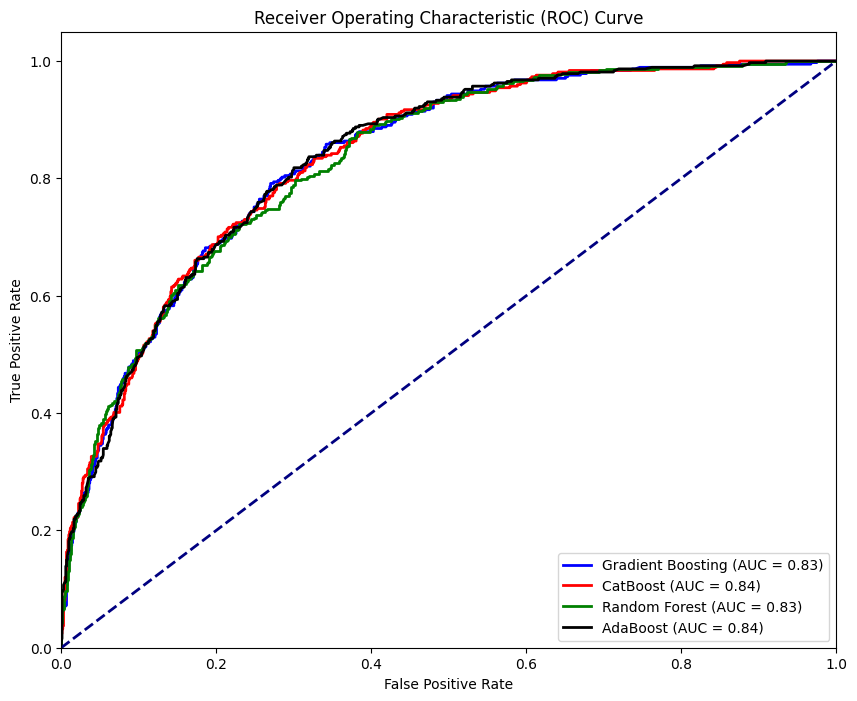

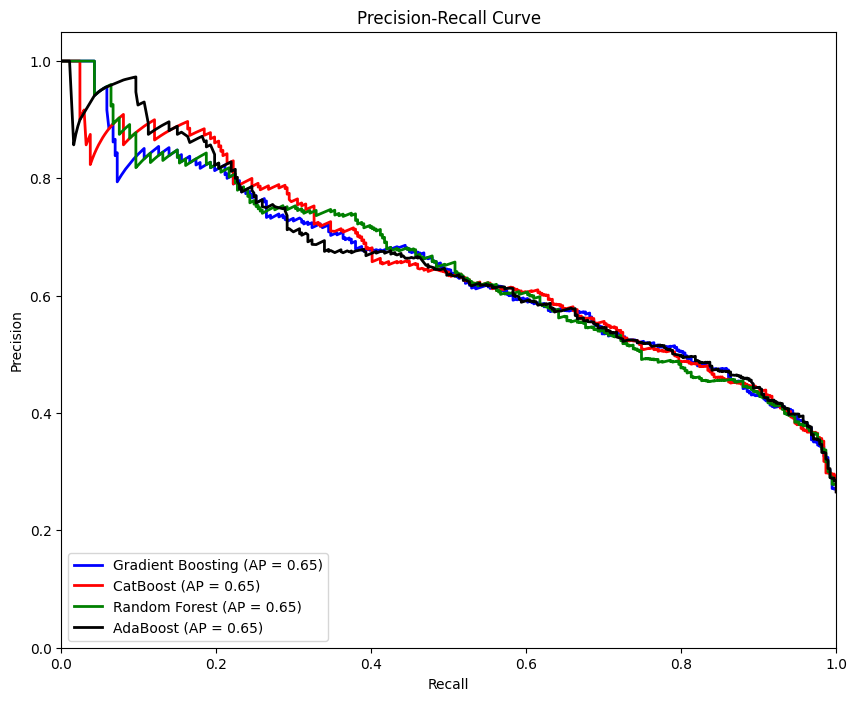

In [24]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from joblib import load
from itertools import cycle

import matplotlib.pyplot as plt

# Load the best models
model_paths = [
    'E:/Practice/python/ml/churn/final/hyper/Gradient Boosting_best_model.joblib',
    'E:/Practice/python/ml/churn/final/hyper/CatBoost_best_model.joblib',
    'E:/Practice/python/ml/churn/final/hyper/Random Forest_best_model.joblib',
    'E:/Practice/python/ml/churn/final/hyper/AdaBoost_best_model.joblib'
]

models = {path.split('/')[-1].split('_')[0]: load(path) for path in model_paths}

def plot_roc_curves(models, X, y):
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green', 'black', 'yellow'])
    
    for (name, model), color in zip(models.items(), colors):
        y_pred_proba = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, color=color, lw=2,
                 label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curves(models, X, y):
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green', 'black', 'yellow'])
    
    for (name, model), color in zip(models.items(), colors):
        y_pred_proba = model.predict_proba(X)[:, 1]
        precision, recall, _ = precision_recall_curve(y, y_pred_proba)
        average_precision = average_precision_score(y, y_pred_proba)
        
        plt.plot(recall, precision, color=color, lw=2,
                 label=f'{name} (AP = {average_precision:.2f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Assuming `X_test_onehot_encoded` and `Y_test` are already defined
plot_roc_curves(models, X_test_onehot_encoded, Y_test)
plot_precision_recall_curves(models, X_test_onehot_encoded, Y_test)

In [60]:
from sklearn.ensemble import VotingClassifier

# Get the top two models with the same encoding and sampling
best_models = []
for name, metrics in sorted_results:
    if len(best_models) < 4 and 'OneHotEncoded' in name and 'No Sampleing' in name:
        best_models.append((name.split(' - ')[0], models[name.split(' - ')[0]]))

print("Best Models:")
for name, model in best_models:
    print(f"{name}: {model}")

# Create a VotingClassifier with the top two models
voting_clf = VotingClassifier(estimators=best_models, voting='soft')

# Train the VotingClassifier
voting_clf.fit(X_train_onehot_encoded, Y_train)

# Evaluate the VotingClassifier
y_pred = voting_clf.predict(X_test_onehot_encoded)
y_pred_proba = voting_clf.predict_proba(X_test_onehot_encoded)[:, 1]

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

print(f'Voting Classifier Accuracy: {accuracy:.4f}')
print(f'Voting Classifier Precision: {precision:.4f}')
print(f'Voting Classifier Recall: {recall:.4f}')
print(f'Voting Classifier F1 Score: {f1:.4f}')
print(f'Voting Classifier ROC AUC: {roc_auc:.4f}')

# Save the VotingClassifier model
dump(voting_clf, 'E:/Practice/python/ml/churn/final/2models/voting_classifier - OneHotEncoded - No Sampleing.joblib')

Best Models:
Gradient Boosting: GradientBoostingClassifier(random_state=42)
Categorical Boosting: <catboost.core.CatBoostClassifier object at 0x000002044FDE61E0>
Random Forest: RandomForestClassifier(random_state=42)
AdaBoost: AdaBoostClassifier(random_state=42)
Voting Classifier Accuracy: 0.8074
Voting Classifier Precision: 0.6873
Voting Classifier Recall: 0.5053
Voting Classifier F1 Score: 0.5824
Voting Classifier ROC AUC: 0.8358


['E:/Practice/python/ml/churn/final/2models/voting_classifier - OneHotEncoded - No Sampleing.joblib']

In [62]:
from sklearn.ensemble import StackingClassifier

# Extract the top 4 models from sorted_results
top_models = sorted_results[:2]

# Define the base models and the meta model
meta_model_name, meta_model_metrics = top_models[0]
base_models = [(name.split(' - ')[0], models[name.split(' - ')[0]]) for name, _ in top_models[1:2]]

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=models[meta_model_name.split(' - ')[0]], cv=5)

# Train the StackingClassifier
stacking_clf.fit(X_train_onehot_encoded, Y_train)

# Evaluate the StackingClassifier
y_pred = stacking_clf.predict(X_test_onehot_encoded)
y_pred_proba = stacking_clf.predict_proba(X_test_onehot_encoded)[:, 1]

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

print(f'Stacking Classifier Accuracy: {accuracy:.4f}')
print(f'Stacking Classifier Precision: {precision:.4f}')
print(f'Stacking Classifier Recall: {recall:.4f}')
print(f'Stacking Classifier F1 Score: {f1:.4f}')
print(f'Stacking Classifier ROC AUC: {roc_auc:.4f}')

# Save the StackingClassifier model
dump(stacking_clf, 'E:/Practice/python/ml/churn/final/2models/stacking_classifier.joblib')

Stacking Classifier Accuracy: 0.7903
Stacking Classifier Precision: 0.6513
Stacking Classifier Recall: 0.4545
Stacking Classifier F1 Score: 0.5354
Stacking Classifier ROC AUC: 0.8325


['E:/Practice/python/ml/churn/final/2models/stacking_classifier.joblib']

## Conclusion

### VotingClassifier has the Best metrics
#### Which is ensemble of

- Gradient Boosting
- Categorical Boosting
- Random Forest
- Adaptive Boosting